In [1]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import random

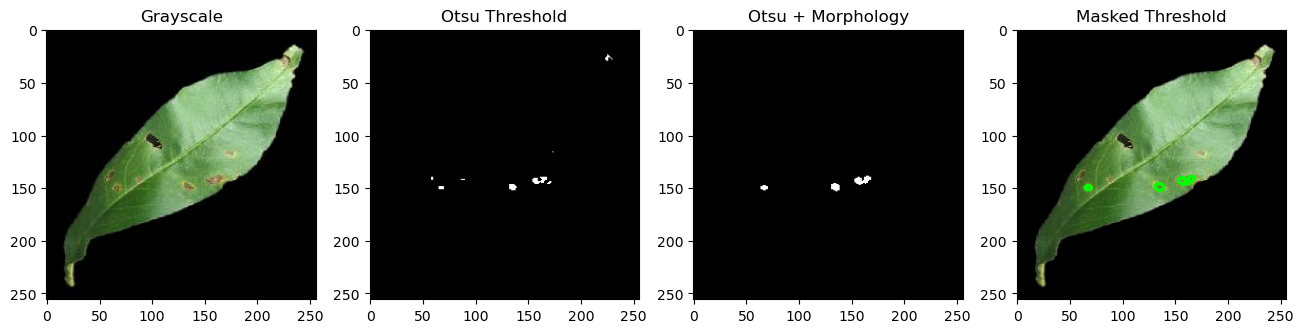

In [41]:
image = cv2.imread('raw/segmented_sorted/fe24139b-640d-498f-93d3-c14458c040f0___Rut._Bact.S 1305_final_masked.jpg')
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
leaf_mask = gray > 15
leaf_mask_uint8 = (leaf_mask * 255).astype(np.uint8)
leaf_only = cv2.bitwise_and(gray, gray, mask=leaf_mask_uint8)
leaf_only_rgb = cv2.bitwise_and(rgb, rgb, mask=leaf_mask_uint8)
leaf_only_hsv = cv2.bitwise_and(hsv, hsv, mask=leaf_mask_uint8)
spot_mask = cv2.inRange(leaf_only_hsv, (10, 50, 0), (30, 255, 155))
spot_only = cv2.bitwise_and(leaf_only, leaf_only, mask=spot_mask)
blur = cv2.GaussianBlur(spot_only, (3,3), 0)
ret,threshold = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
threshold_masked = cv2.bitwise_and(threshold, threshold, mask=leaf_mask_uint8)

kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
threshold_clean1 = cv2.morphologyEx(threshold_masked, cv2.MORPH_ERODE, kernel1)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
threshold_clean2 = cv2.morphologyEx(threshold_clean1, cv2.MORPH_DILATE, kernel2)
# kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
# threshold_clean3 = cv2.morphologyEx(threshold_clean2, cv2.MORPH_DILATE, kernel3)

contours, hierarchy = cv2.findContours(threshold_clean2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # area = cv2.contourArea(c)
    # if 0 < area < 50:
    cv2.drawContours(leaf_only_rgb, [c], -1, (0, 255, 0), 2)

# plt.subplot(1,2,1)
# plt.imshow(rgb)

# plt.subplot(1,2,2)
# plt.imshow(spot_mask)

plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.title("Grayscale")
plt.imshow(rgb, cmap='gray')

plt.subplot(1, 4, 2)
plt.title("Otsu Threshold")
plt.imshow(threshold, cmap='gray')

plt.subplot(1, 4, 3)
plt.title("Otsu + Morphology")
plt.imshow(threshold_clean2, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Masked Threshold")
plt.imshow(leaf_only_rgb, cmap='gray')

In [4]:
leaf_mask[200, 150]

True